# Lending Club Case Study

In [1]:
#import required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
#read csv file
#Read csv in loan_ini- Initial(raw data) data frame
#This will hold all the columns before cleanup
loan_ini = pd.read_csv("loan.csv", low_memory=False)

In [3]:
#Check raw data frame shape
loan_ini.shape

(39717, 111)

In [4]:
#Analyze the columns available
loan_ini.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning

In [5]:
#Check for duplicate rows
loan_ini = loan_ini.drop_duplicates()
loan_ini.shape
#No change in shape, so there are no duplicates in the data

(39717, 111)

In [6]:
#Dropping all the rows where loan status is ongoing and there is no default as of now
#these entries will be of no use for analysis as we are not sure whether they will default or not in future
loan_final = loan_ini[~(loan_ini["loan_status"]=="Current")]
loan_final["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [7]:
#Check null/blank values count in each column
loan_final.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

In [8]:
# get the percentage of null values in each column
loan_per = round((loan_final.isnull().sum()/loan_final["id"].count())*100, 2)
loan_per

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [9]:
# create list of columns with greater than 60% null values
#finally get the corresponding columns into a list format
loan_60 = loan_per.loc[loan_per>60]
list1 = list(loan_60.index)
list1

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',


In [10]:
#Deleting all the columns which contains more than 60% blank values
#As these will not add any value to analysis
loan_final = loan_final.drop(list1, axis=1)

In [11]:
#Recheck the data frame after deleting the unwanted columns
loan_per1 = round((loan_final.isnull().sum()/loan_final["id"].count())*100, 2)
loan_per1

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.68
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.47
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [12]:
# remove unwanted columns manually
#few more coumns which has 100% of data available but will not add any value to analysis can be safely deleted
# emp_title data doesn't match with description
#get such columns name in a list format to detele it from final data frame
list2 = ["id", "member_id", "pymnt_plan", "url", "zip_code", "desc", "emp_title"]
loan_final = loan_final.drop(list2, axis=1)

In [13]:
#Check final shape of dataframe after data clean up
loan_final.shape

(38577, 47)

In [14]:
#check data available
loan_final.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,...,38577.000000,38577.000000,38577.000000,38521.0,38577.0,38577.0,38521.0,38577.0,37880.000000,38538.0
mean,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,...,98.035545,12.772728,2746.243218,0.0,1.0,0.0,0.0,0.0,0.043479,0.0
std,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,...,698.650182,150.836853,4494.648131,0.0,0.0,0.0,0.0,0.0,0.204583,0.0
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,217.420000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,...,0.000000,0.000000,568.260000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,...,0.000000,0.000000,3447.250000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [15]:
#Recheck the data frame after deleting the unwanted columns
#Since laon_amnt column does not have any blank value, this time we will check the blank % against this column as
# we have deleted id column in earlier step
loan_per2 = round((loan_final.isnull().sum()/loan_final["loan_amnt"].count())*100, 2)
loan_per2

loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_length                    2.68
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
purpose                       0.00
title                         0.03
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal                     0.00
revol_util                    0.13
total_acc                     0.00
initial_list_status           0.00
out_prncp                     0.00
out_prncp_inv       

In [16]:
#Check data types for all the columns
loan_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   term                        38577 non-null  object 
 4   int_rate                    38577 non-null  object 
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_length                  37544 non-null  object 
 9   home_ownership              38577 non-null  object 
 10  annual_inc                  38577 non-null  float64
 11  verification_status         38577 non-null  object 
 12  issue_d                     38577 non-null  object 
 13  loan_status                 385

In [17]:
# The column int_rate is character type, let's convert it to float
loan_final['int_rate'] = loan_final['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [18]:
#Confirm the changes done to int_rate column
loan_final.int_rate.dtypes

dtype('float64')

In [19]:
#Adding a new derived column loan_status_num of numeric type based on loan_status column 
#0 - fully pain & 1 charged off
loan_final['loan_status_num'] = loan_final['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [20]:
#Reconfirm the data in newly created column
loan_final.loan_status_num.value_counts()

0    32950
1     5627
Name: loan_status_num, dtype: int64

# Data Understanding

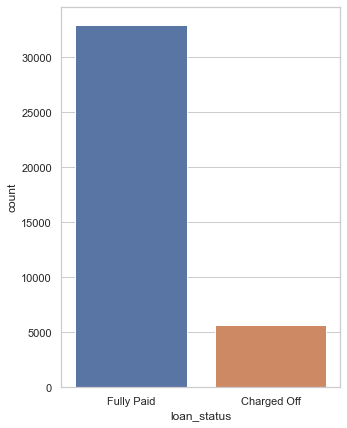

In [21]:
#Check over all data for charged off and paid loan total
plt.figure(figsize=(5,7))
sns.countplot(x='loan_status', data=loan_final)
plt.show()

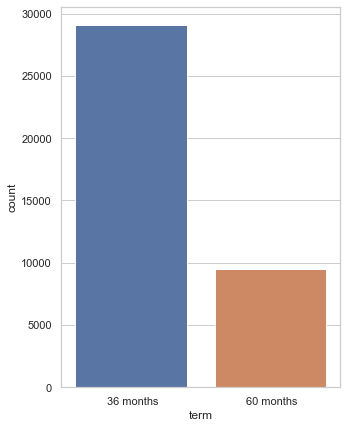

In [22]:
#Check distribution of loans based on term
plt.figure(figsize=(5, 7))
sns.countplot(x='term', data=loan_final)
plt.show()

In [23]:
# default rate
(round(np.mean(loan_final['loan_status_num']), 3))*100

14.6

In [24]:
# Check the proportion of loans given "Fully Paid" and "Charged off" customers by LC
loan_amnt_tot = loan_final[["loan_amnt", "loan_status"]]
loan_amnt_tot.groupby("loan_status").sum()/loan_final["loan_amnt"].sum()

,loan_amnt
loan_status,
Charged Off,0.159825
Fully Paid,0.840175


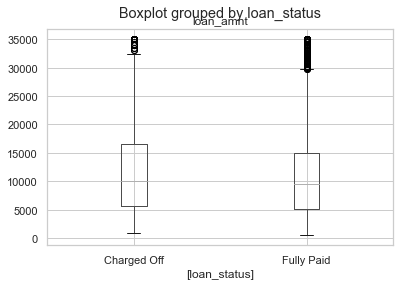

In [25]:
# Understand loan_amnt distribution
loan_amnt_tot.boxplot(by='loan_status')
plt.show()

In [26]:
# Check profit margin on the "Fully Paid" loans
loans_fullyPaid = loan_final[loan_final["loan_status_num"] == 0]
margin_per = (loans_fullyPaid["total_rec_int"].sum()/loans_fullyPaid["loan_amnt"].sum())*100
round(margin_per, 1)

19.4

In [27]:
# Check recoveries on the "Charged Off" loans
loans_chargedOff = loan_final[loan_final["loan_status_num"] == 1]
recovery_per = (loans_chargedOff["total_pymnt"].sum()/loans_chargedOff["loan_amnt"].sum())*100
round(recovery_per, 1)

56.5

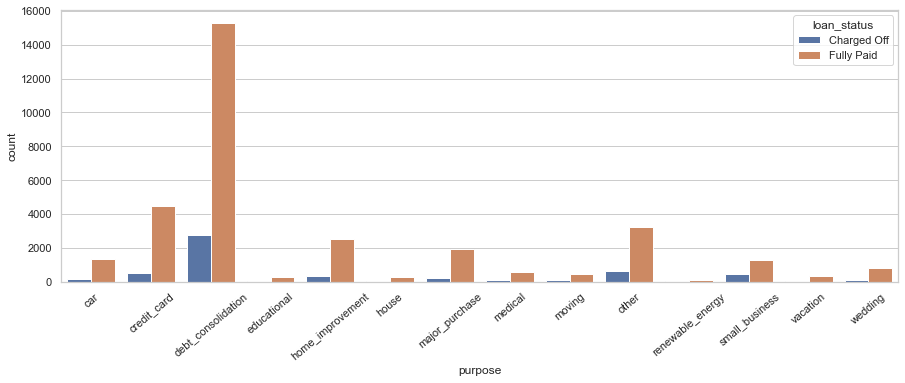

In [28]:
# Loans distribution by "purpose"
loan_purpose = loan_final[["purpose", "loan_status", "loan_status_num"]]
loan_purpose = loan_purpose.groupby(["purpose", "loan_status"]).count().reset_index().rename(columns={'loan_status_num':'count'})

fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x="purpose", y="count", hue = "loan_status", data=loan_purpose, ax=ax)
plt.xticks(rotation=40) 
plt.show()

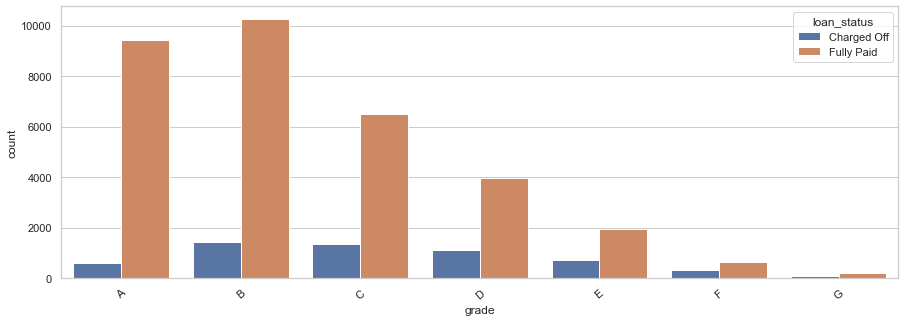

In [29]:
# Loans distribution by "grade" category
loan_grade = loan_final[["grade", "loan_status", "loan_status_num"]]
loan_grade = loan_grade.groupby(["grade", "loan_status"]).count().reset_index().rename(columns={'loan_status_num':'count'})

fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x="grade", y="count", hue = "loan_status", data=loan_grade, ax=ax)
plt.xticks(rotation=40) 
plt.show()

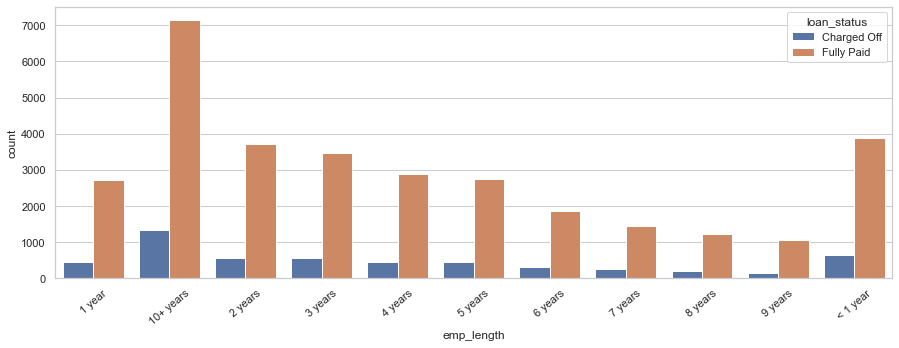

In [30]:
# Loans distribution by "emp_length" category
emp_length = loan_final[["emp_length", "loan_status", "loan_status_num"]]
emp_length = emp_length.groupby(["emp_length", "loan_status"]).count().reset_index().rename(columns={'loan_status_num':'count'})

fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x="emp_length", y="count", hue = "loan_status", data=emp_length, ax=ax)
plt.xticks(rotation=40) 
plt.show()

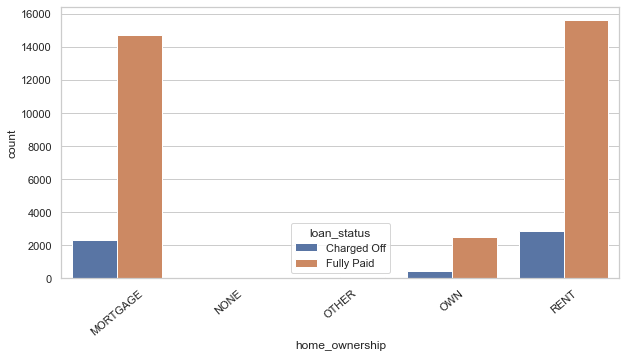

In [31]:
# Loans distribution by "home_ownership" category
loan_HO = loan_final[["home_ownership", "loan_status", "loan_status_num"]]
loan_HO = loan_HO.groupby(["home_ownership", "loan_status"]).count().reset_index().rename(columns={'loan_status_num':'count'})

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x="home_ownership", y="count", hue = "loan_status", data=loan_HO, ax=ax)
plt.xticks(rotation=40) 
plt.show()

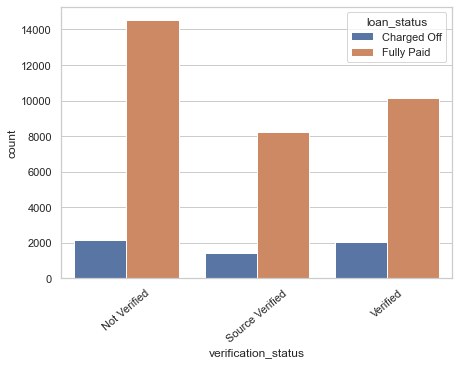

In [32]:
# Loans distribution by "verification_status" category
loan_VS = loan_final[["verification_status", "loan_status", "loan_status_num"]]
loan_VS = loan_VS.groupby(["verification_status", "loan_status"]).count().reset_index().rename(columns={'loan_status_num':'count'})

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x="verification_status", y="count", hue = "loan_status", data=loan_VS, ax=ax)
plt.xticks(rotation=40) 
plt.show()

In [33]:
# Loan distribution by individual annual income
loan_AI = loan_final[["annual_inc", "loan_status"]]
loan_AI.groupby("loan_status").describe()

annual_inc                                                         \
                 count          mean           std     min       25%      50%   
loan_status                                                                     
Charged Off     5627.0  62427.298034  47776.014188  4080.0  37000.00  53000.0   
Fully Paid     32950.0  69862.503328  66562.246521  4000.0  41132.75  60000.0   

                                 
                 75%        max  
loan_status                      
Charged Off  75000.0  1250000.0  
Fully Paid   84000.0  6000000.0

In [34]:
# Loan distribution by dti parameter
loan_dti = loan_final[["dti", "loan_status"]]
loan_dti.groupby("loan_status").describe()

dti                                                     
               count       mean       std  min   25%    50%    75%    max
loan_status                                                              
Charged Off   5627.0  14.000624  6.585577  0.0  9.05  14.29  19.29  29.85
Fully Paid   32950.0  13.148421  6.680041  0.0  7.98  13.20  18.39  29.99

## Observations
### 1. Overall 14.6% of loan are defaulted or charged off
### 2. Over 84% loans were given to Fully paid customers, while 16% loans were given to Charged off customers
### 3. Almost 50% of total amount of LC is given to below 10,000 loan amounts 
### 4. LC earned 19.4% profit on "Fully paid" loans where as only 56.5% recoveries on the money lent to "Charged off" customers
### 5. Maximum number of loans are given for debt_consolidation, followed by credit_card and other.
### 6. Most of the loans were given to high grade customers, highest is B followed by A and lowest is G
### 7. Most of the loans were given for 36 months duration
### 8. Most of the loans were given to people having 10+ years emp_length. Interestingly for less than 10 years of emp_length, no of loans are decreasing with increase of emp_length.
### 9. Distribution of loans with home_ownership is in the order Rent, Mortagage, Own and etc.
### 10. Distribution of loans with verification_status is in the order Not Verified, Verified and Source Verified.

# Data Analysis

C:\Users\tools\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


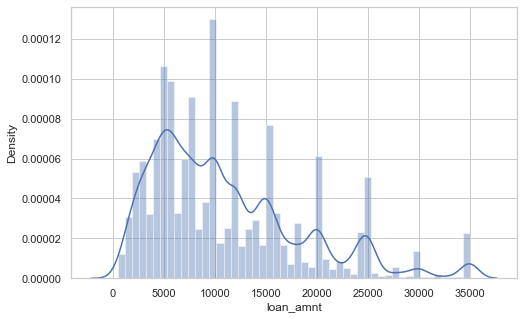

In [35]:
# Loan amount vs Default rate
plt.figure(figsize=(8, 5))
b = sns.distplot(loan_final["loan_amnt"])
#it is observed that after each 5000 bucket, loan amount has a jump

In [36]:
# Function to plot loan status accross various variables 
def plot_cat(var):
    s = sns.barplot(data=loan_final, x=var, y='loan_status_num')
    return s

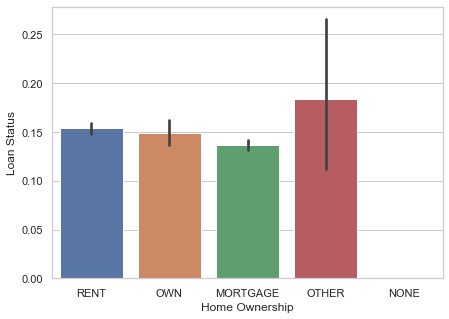

In [37]:
plt.figure(figsize=(7,5))
s = plot_cat("home_ownership")
s.set(xlabel='Home Ownership', ylabel='Loan Status')
plt.show()
#Others category has the highest default rate
#Loan should be provided to people who either has own or mortgage home ownership

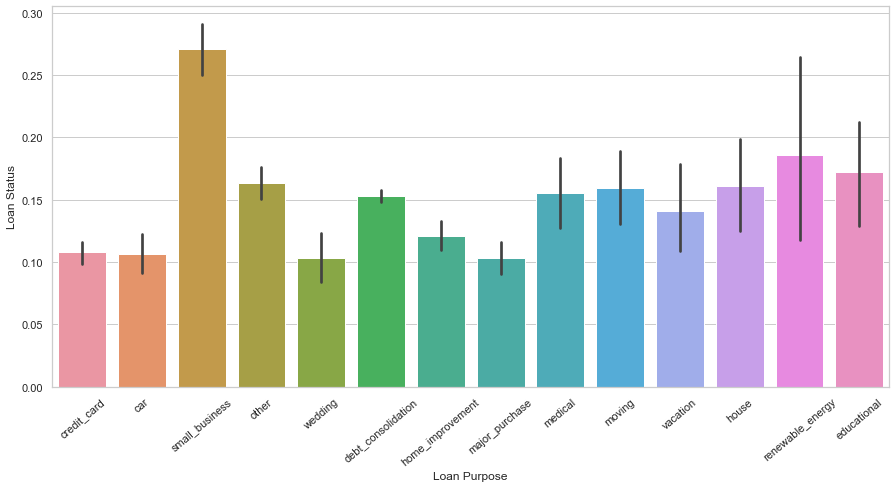

In [38]:
plt.figure(figsize=(15,7))
s= plot_cat("purpose")
s.set(xlabel='Loan Purpose', ylabel='Loan Status')
plt.xticks(rotation=40) 
plt.show()
#Small business loan is the highest in default rate

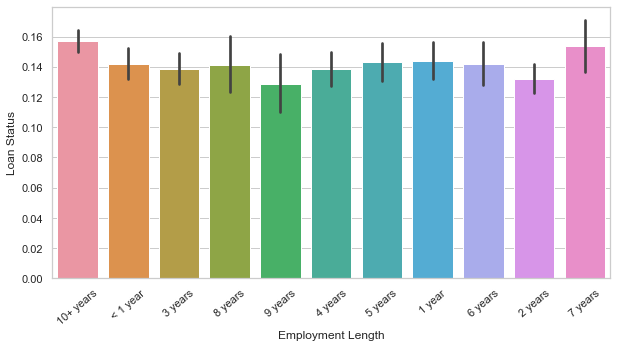

In [39]:
plt.figure(figsize=(10,5))
s= plot_cat("emp_length")
s.set(xlabel='Employment Length', ylabel='Loan Status')
plt.xticks(rotation=40) 
plt.show()
#length of employment does not make any significant difference in default rate

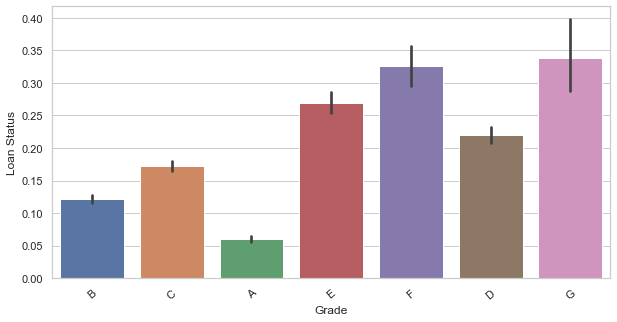

In [40]:
plt.figure(figsize=(10,5))
s= plot_cat("grade")
s.set(xlabel='Grade', ylabel='Loan Status')
plt.xticks(rotation=40) 
plt.show()
#Grades are working as expected.
#Lower grade has less default %

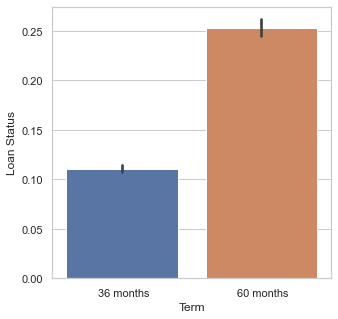

In [41]:
plt.figure(figsize=(5,5))
s= plot_cat("term")
s.set(xlabel='Term', ylabel='Loan Status')
plt.show()
#60months term has high default rate

In [42]:
#lets see the interest rate provided 
loan_final.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [43]:
#it is observed that interest rate varies from 5.42 to 24%
#Lets create bucket of 5% increment to analyze this variable further
#New column int_buc will be created 
def rate(n):
    if n > 5 and n <= 10:
        return '5-10%'
    elif n > 10 and n <=15:
        return '10-15%'
    elif n > 15 and n <=20:
        return '15-20%'
    else:
        return '20-25%'
    
loan_final['int_buc'] = loan_final['int_rate'].apply(lambda x: rate(x))

In [44]:
#Check data in newely created column
loan_final.int_buc.value_counts()

10-15%    18265
5-10%     12316
15-20%     7226
20-25%      770
Name: int_buc, dtype: int64

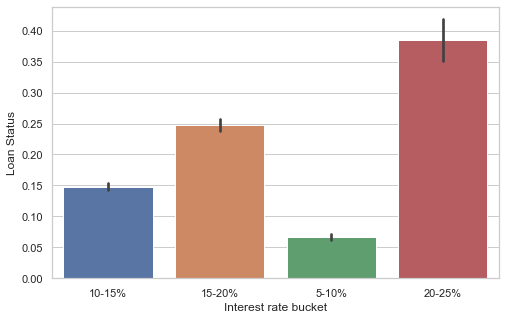

In [45]:
plt.figure(figsize=(8,5))
s= plot_cat("int_buc")
s.set(xlabel='Interest rate bucket', ylabel='Loan Status')
plt.show()
#Default % increases drastically when rate of interest goes beyond 15%
#this is as expected

In [46]:
#lets analuze dti rate
loan_final.dti.describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [47]:
#it is observed that dti(debt to income ratio) varies from 0 to 30%
#Lets create bucket of 5% increment to analyze this variable further
#New column dti_buc will be created 
def rate(n):
    if n > 0 and n <= 5:
        return '0-5%'
    elif n > 5 and n <=10:
        return '5-10%'
    elif n > 10 and n <=15:
        return '10-15%'
    elif n > 15 and n <=20:
        return '15-20%'
    elif n > 20 and n <=25:
        return '20-25%'
    else:
        return '25-30%'
    
loan_final['dti_buc'] = loan_final['dti'].apply(lambda x: rate(x))

In [48]:
#Check data in newely created column
loan_final.dti_buc.value_counts()

10-15%    9630
15-20%    8811
5-10%     7873
20-25%    6578
0-5%      4884
25-30%     801
Name: dti_buc, dtype: int64

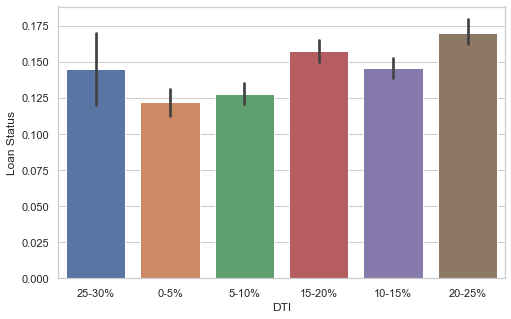

In [49]:
plt.figure(figsize=(8,5))
s= plot_cat("dti_buc")
s.set(xlabel='DTI', ylabel='Loan Status')
plt.show()
#Default % increases when rate of dti increases
#this is as expected

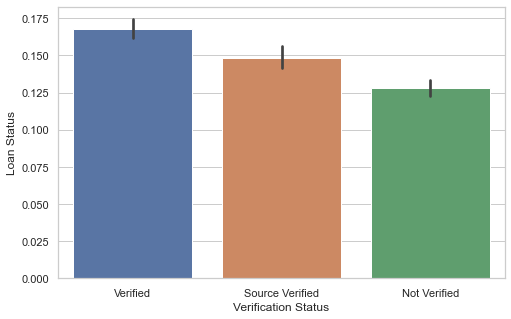

In [50]:
plt.figure(figsize=(8,5))
s= plot_cat("verification_status")
s.set(xlabel='Verification Status', ylabel='Loan Status')
plt.show()
#interestingly, verified loans sees more defaulter as compared to not verified loan
#Verification prosess has to be rechecked

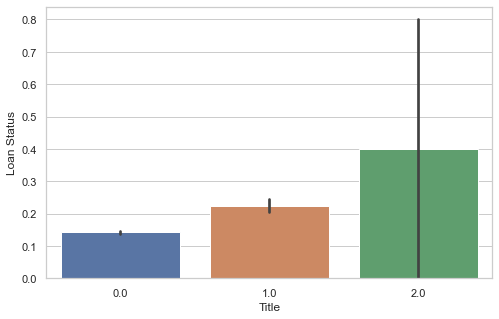

In [51]:
plt.figure(figsize=(8,5))
s= plot_cat("pub_rec_bankruptcies")
s.set(xlabel='Title', ylabel='Loan Status')
plt.show()
#higher Number of public record bankruptcies has higher defaulters

C:\Users\tools\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x720 with 0 Axes>

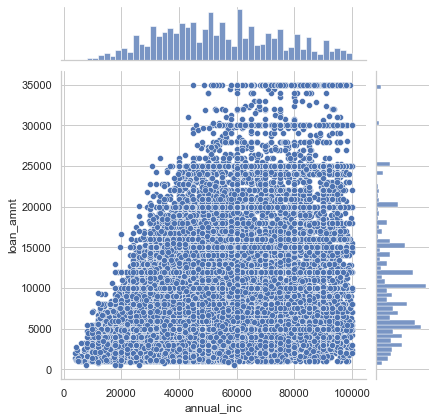

In [52]:
#Scatter plot comparing annual income with loan amount 
plt.figure(figsize=(15, 10))
s = sns.jointplot('annual_inc', 'loan_amnt', loan_final[loan_final['annual_inc']<100000])
plt.show()
#we can observe that there are cases where people with lower income has provided more loan

C:\Users\tools\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


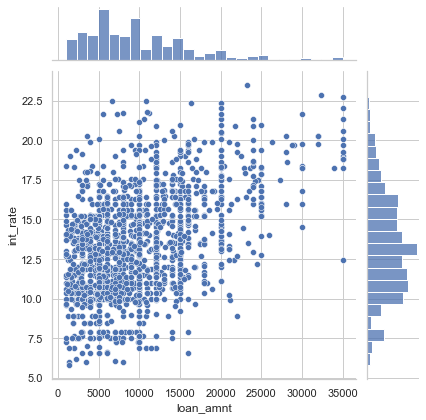

In [53]:
#Scatter plot to view amount and interest provided to people who have prir bad record
sns.jointplot('loan_amnt', 'int_rate', loan_final[loan_final.pub_rec_bankruptcies > 0])
#It is observed that people with bad record has provided with both higher loan amount and interest rate

# Conclusions:-
    Verification process needs to be rechecked. Presently verified loans are defaulted more. 
    Loan should be provided to customers who either has own or mortgage home
    Higher amount or lower interest rate should not be provided when loan purpose is small business.
    Stop providing higher loan and lower interest rate to customers who has prior bad history.
    Higher loan amount should not be provided to low annual income customers. Loan amount should not exceed 50% of total annual income.